In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

In [4]:
# Fetch LFW dataset with minimum faces per person = 40
lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)

In [5]:
print(f"Actual shape of the image: {lfw_people.images.shape[1:]}")

Actual shape of the image: (50, 37)


In [6]:
# Storing the data
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
print(X.shape)

(1777, 1850)


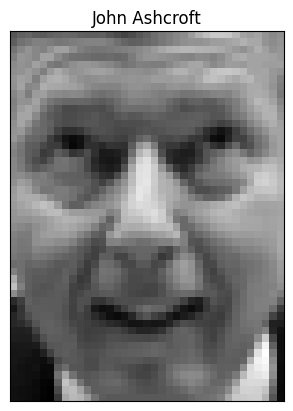

In [7]:
# Example Image
img = X[100].reshape((lfw_people.images.shape[1],lfw_people.images.shape[2]))

plt.title(target_names[y[100]], size=12)
plt.xticks(())
plt.yticks(())
plt.imshow(img, cmap=plt.cm.gray)

# HOG Implementation

In [8]:
def compute_hog(img):
  # Resizing image
  resized_img = resize(img, (128*2, 64*2))
  # Creating hog features
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)
  return fd, hog_image

In [9]:
resized_img = resize(img, (128*2, 64*2))
Hog_feature, hog_image=compute_hog(img)
# These features can be used to classify the images
print(f"Size of features obtained: {Hog_feature.shape}") 

Size of features obtained: (16740,)


# Visualising HOG image

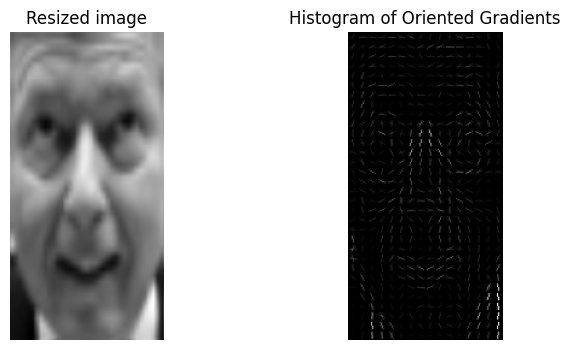

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Resized image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()